# SC1015 Mini Project

In [1]:
# Basic Libraries 
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## 1. Cleaning the Data Set

In [2]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

##### 1a. Dropping unwanted columns that are redundant. and Rows that contained not aired yet. 

In [4]:
### Removing unwanted columns
df = df.drop(columns = ['title_japanese','title_english','title_synonyms','image_url','background','related','opening_theme','ending_theme','aired','producer','licensor','broadcast','premiered'])

In [5]:
## Removing Rows with Status 'Not aried yet'
df = df[(df['status'] == 'Finished Airing') | (df['status'] == 'Currently Airing')]

In [6]:
## converting the duration columns to integer
def extract_minutes(duration_str):
    # Check if duration string is in expected format
    if isinstance(duration_str, str) and 'min' in duration_str:
        # Extract numeric part of duration string
        minutes_str = duration_str.split()[0]
        # Convert to integer
        minutes = int(minutes_str)
    else:
        # Return missing value if duration string is not in expected format
        minutes = None
    return minutes

# Apply the function to each value in the duration column
df['duration'] = df['duration'].apply(extract_minutes)

# Verify dtype is now int
print(df['duration'].dtype)

float64


###### 1.b Change the air_string to a integer value that returns the number of days it was aired. 

In [7]:
import re
from datetime import datetime

# Define function to extract start and end dates from aired_string column
def extract_dates(aired_str):
    # Extract start and end dates using regular expressions
    pattern = r'(\w{3}\s\d{1,2},\s\d{4})\sto\s(\w{3}\s\d{1,2},\s\d{4})'
    matches = re.findall(pattern, aired_str)
    if matches:
        start_date_str, end_date_str = matches[0]
        # Convert start and end dates to datetime objects
        start_date = datetime.strptime(start_date_str, '%b %d, %Y')
        end_date = datetime.strptime(end_date_str, '%b %d, %Y')
        # Calculate number of days between start and end dates
        days = (end_date - start_date).days
        return days
    else:
        return None

# Apply function to aired_string column
df['aired_string'] = df['aired_string'].apply(extract_dates)

In [8]:
df = df[(df['type'] == 'TV') | (df['type'] == 'Movie') | (df['type'] == 'ONA')]

In [9]:
df = df[(df['episodes'] != 0)]

In [10]:
df

,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,77.0,24.0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,182.0,24.0,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,356.0,24.0,PG - Children,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,280.0,16.0,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,175.0,24.0,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,37577,Hibike! Euphonium Movie: Todoketai Melody - Ph...,Movie,Unknown,3,Finished Airing,False,NaN,4.0,PG-13 - Teens 13 or older,5.66,35,10480.0,8789,809,1,Kyoto Animation,Comedy
14446,26149,Tobiuo no Boy wa Byouki Desu,Movie,Unknown,1,Finished Airing,False,NaN,19.0,G - All Ages,6.60,5,12499.0,13793,67,0,NaN,"Fantasy, Historical, Kids"
14465,27579,Mii-chan no Tenohira,Movie,Unknown,1,Finished Airing,False,NaN,20.0,G - All Ages,6.60,5,11298.0,13318,90,0,NaN,"Historical, Drama"
14466,36640,Mashiro Witch,ONA,Game,1,Finished Airing,False,NaN,2.0,PG-13 - Teens 13 or older,4.57,7,11242.0,14464,24,0,NaN,"Game, Magic"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 0 to 14473
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      7550 non-null   int64  
 1   title         7550 non-null   object 
 2   type          7550 non-null   object 
 3   source        7550 non-null   object 
 4   episodes      7550 non-null   int64  
 5   status        7550 non-null   object 
 6   airing        7550 non-null   bool   
 7   aired_string  4301 non-null   float64
 8   duration      7244 non-null   float64
 9   rating        7550 non-null   object 
 10  score         7550 non-null   float64
 11  scored_by     7550 non-null   int64  
 12  rank          7539 non-null   float64
 13  popularity    7550 non-null   int64  
 14  members       7550 non-null   int64  
 15  favorites     7550 non-null   int64  
 16  studio        5068 non-null   object 
 17  genre         7499 non-null   object 
dtypes: bool(1), float64(4), int

In [12]:
## make the data for aired string for movies to be 1 day

#### 1c. Checking for Duplicates in our data, Ensure no duplicates in data set. Observe there is no duplicated rows for us to remove. Cleaning is done. 

In [13]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre


## 2. Exploratory Data Analysis (EDA)
#### Data Visualization 
Break down into this few segments
1. The relationship behind the maturity rating and anime rating.
2. Anime duration vs anime rating. 
3. The number of anime titles by genre.
4. Explore studios from the dataframe. 
5. The distribution of anime scores and popularity.
6. The relationship between the number of members and the anime rating.
7. The distribution of anime ratings and popularity.

##### 2.1 Lets look at how the maturity rating affects the number of anime. 

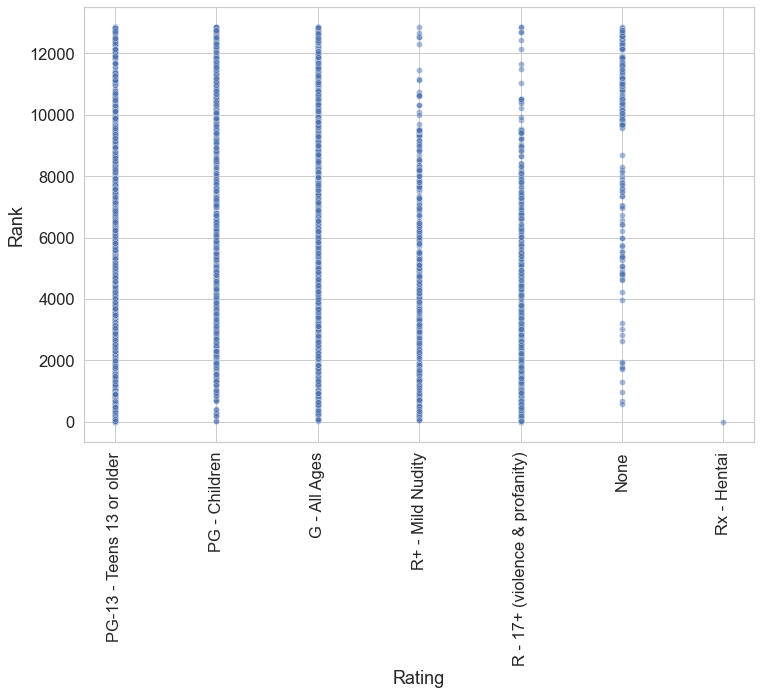

In [14]:
sb.set(style='whitegrid', font_scale=1.5)

fig, ax = plt.subplots(figsize=(12,8))

sb.scatterplot(x='rating', y='rank', data=df, alpha=0.5, ax=ax)

ax.set_xlabel('Rating')
plt.xticks(rotation=90)
ax.set_ylabel('Rank')

plt.show()

In [15]:
# Count the number of anime in each maturity rating
count_by_rating = df['rating'].value_counts()

# Print the results
print(count_by_rating)

PG-13 - Teens 13 or older         2853
G - All Ages                      2539
PG - Children                      932
R - 17+ (violence & profanity)     605
R+ - Mild Nudity                   379
None                               230
Rx - Hentai                         12
Name: rating, dtype: int64


###### Observation : 
From the plot and data set we can observe that . PG-13 has the highest number of titles released followed by G, PG, R-17, R+, None, Rx-Hentai. 

We can also see that the correlation of matruity with rank is not strongly related. However we can tell that the Maturity Rating of lower than R+ has more titles that has rank 10,000 or more. Since the lower the rank the better the anime. We can tell that if an anime is of the Rating R+ and above it will highly likey be rated lower than 10,000.

#### 2.2 Relationship of Anime Duration Vs Rank of the anime

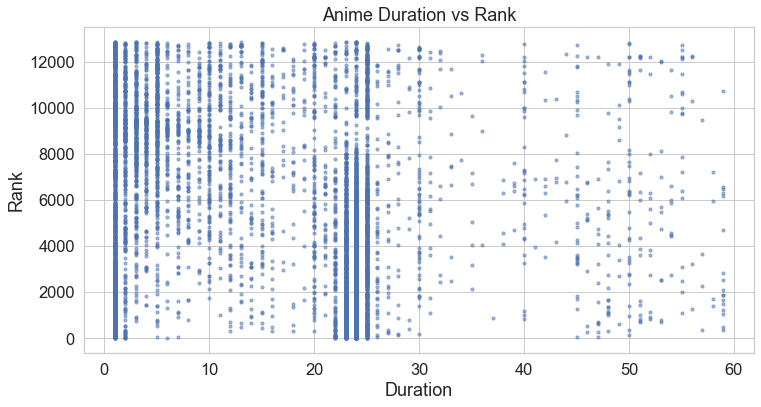

In [16]:
## lets look at how the anime duration affects the rank.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['duration'], df['rank'], s=10, alpha=0.5)

ax.set_xlabel('Duration')
ax.set_ylabel('Rank')
ax.set_title('Anime Duration vs Rank')

plt.show()

In [17]:
top_5_durations = df['duration'].value_counts().head()
print('Episode duration (mins) | Number of titles')
print('---- | ----')
print(top_5_durations)


Episode duration (mins) | Number of titles
---- | ----
24.0    1427
1.0     1304
25.0     755
23.0     739
5.0      326
Name: duration, dtype: int64


##### Observation : 
From the scatter plot of duration against rank, we can see that there is a weak negative correlation between the two variables. This means that as the duration of the anime increases, the rank tends to decrease slightly. However, the correlation is weak, which means that duration is not a very strong predictor of rank.

We can also observe that there are some outliers with very high duration and high rank, suggesting that there are some anime with long durations that are still very popular and highly ranked.

The most popular episode duration with the largest number of title is 24 mins with 1427 titles, 1 min for 1304 titles and 25mins at 755 titles.

The 24 mins and 25 mins are understandable as the standard episode length in Japan is aorund 24-25 mins when the anime is aired. The 1 min epsiode length is most likely due to Original Video Animation (OVA) a short video released especially for the relaese in home video formats.

#### 2.3 Relationship of anime title vs genres

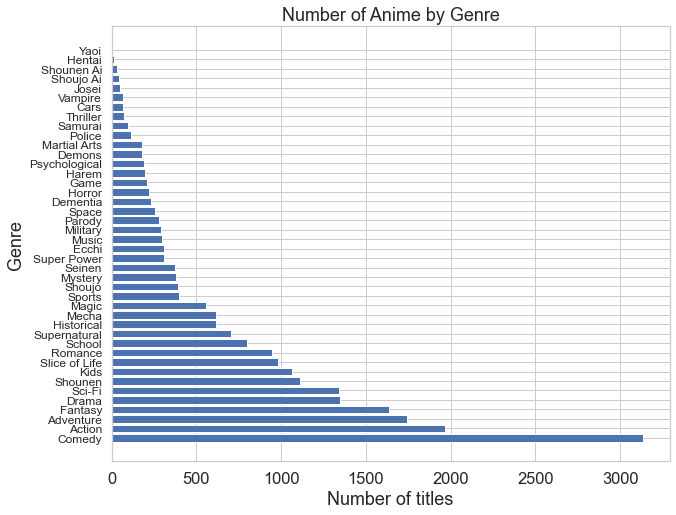

In [18]:
genre_count = {}
for genres in df['genre']:
    if pd.isnull(genres):
        continue
    for genre in genres.split(','):
        if genre.strip() in genre_count:
            genre_count[genre.strip()] += 1
        else:
            genre_count[genre.strip()] = 1

# Sort the genres by their count in descending order
sorted_genre_count = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1], reverse=True)}

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(list(sorted_genre_count.keys()), list(sorted_genre_count.values()))
ax.set_xlabel('Number of titles')
ax.set_ylabel('Genre')
ax.set_title('Number of Anime by Genre')
ax.tick_params(axis='y', labelsize=12)
plt.show()

###### Obesrvation: 
From the bar graph, we can see the distribution of the number of anime titles by genre. 

We can observe that the "Comedy" and "Action" genres have the highest number of titles, followed by "Romance," "Fantasy," "Adventure," and "Drama." We can also see that some genres have very few titles.

This tells us that most anime titles out in the market are classified as comedy or action.

##### 2.4 Relationship beteween studios. 

In [27]:
studio_counts = df['studio'].value_counts()
print(studio_counts)
## This returns the number of anime titles produced by the particular studio. Toei Animation is First with 508 anime titles produced. 

Toei Animation                      508
Sunrise                             243
Madhouse                            186
Studio Deen                         162
TMS Entertainment                   150
                                   ... 
Hal Film Maker, TYO Animations        1
Tomason                               1
AIC, Artmic, Animate Film             1
Enoki Films, Dai Nippon Printing      1
Automatic Flowers Studio              1
Name: studio, Length: 593, dtype: int64


In [25]:
# Group the data by studio and calculate the mean rank
mean_rank_by_studio = df.groupby('studio')['rank'].mean().round(1)

# Sort the studios by mean rank in ascending order and select the top 20 with the lowest mean rank
top_studios_low_rank = mean_rank_by_studio.sort_values().head(20)

# Print the result
print(top_studios_low_rank)

studio
Madhouse, MAPPA                           55.0
J.C.Staff, Egg Firm                       65.5
Studio Chizu                              68.0
Tezuka Productions, MAPPA                145.0
Brain&#039;s Base, Marvy Jack            151.0
Studio Gallop, Studio Deen               168.0
Studio Ghibli, Studio Hibari             185.0
Imagin                                   204.0
Gainax, Tatsunoko Production             223.0
Production I.G, Madhouse                 232.5
Studio Gallop, Studio Comet              256.0
Shuka                                    331.3
A-1 Pictures, Trigger, CloverWorks       342.0
Studio Rikka, Purple Cow Studio Japan    352.0
NUT                                      391.0
A-1 Pictures, Bridge                     397.0
Shirogumi, Shin-Ei Animation             406.0
Hoods Drifters Studio                    486.0
Artland, Tatsunoko Production            501.5
Artland, Madhouse                        517.0
Name: rank, dtype: float64


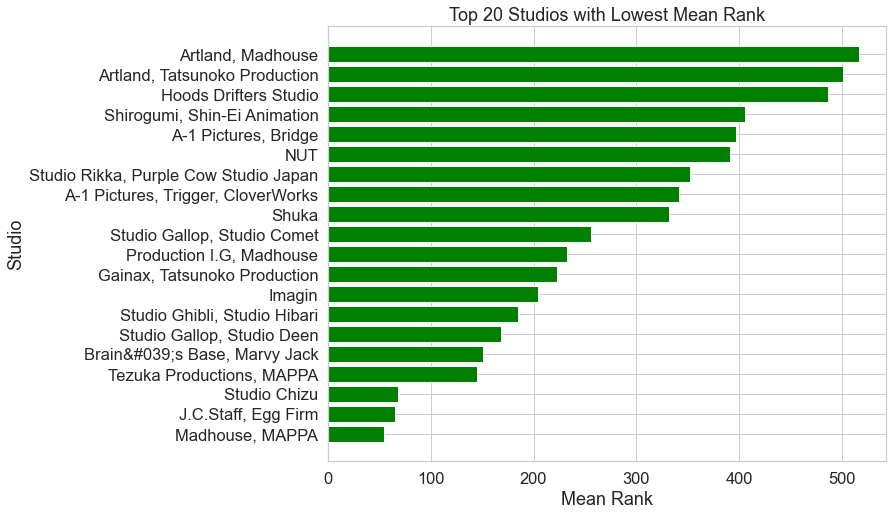

In [26]:
import matplotlib.pyplot as plt

# calculate the mean rank for each studio
studio_ranks = df.groupby('studio')['rank'].mean()

# sort the studios by mean rank in ascending order and take the top 20
lowest_rank_studios = studio_ranks.sort_values().head(20)

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(lowest_rank_studios.index, lowest_rank_studios.values, color='green')
ax.set_xlabel('Mean Rank')
ax.set_ylabel('Studio')
ax.set_title('Top 20 Studios with Lowest Mean Rank')
plt.show()


###### Observation 
Since a lower Ranking would mean that anime title is more popular and higher up in the charts. We took the top 20 studios and average out the rank of the anime that they have produced to give an idea of the work that each studio does. 

We can make some very interesing obersvation here. The Top Studio Madhouse, MAPPA is in the lead with an average Rank of 55.0 Rank. MAPPA is famous for producing top class animation such as Attack On Titan, Jujutsu Kaisen, Chainsaw Man and many other highly rated anime. Other popular studios that make Hits are seen in this top 20 ranking such as Studio Ghibli. We can infer that a anime produced by this studio would likely result in an anime of a lower mean Rank and hence more successfull anime.

##### 2.5 

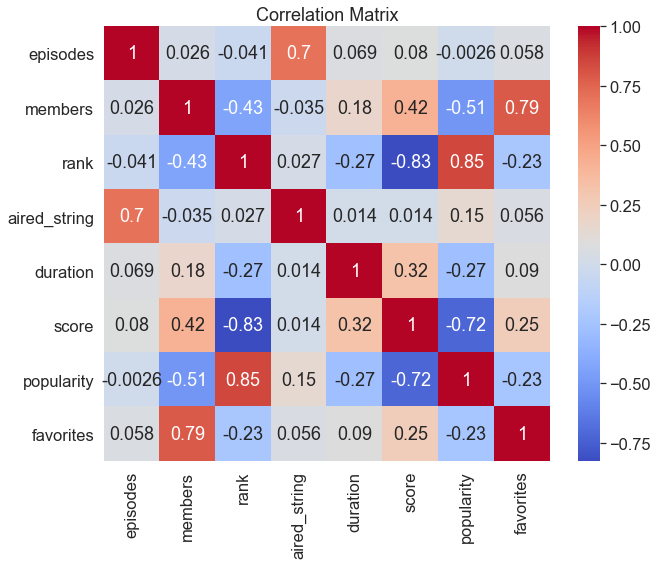

In [21]:
# Select only the numerical columns
num_cols = ['episodes', 'rating', 'members', 'rank','aired_string','duration','score','popularity','favorites']

# Create a correlation matrix
corr_matrix = df[num_cols].corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

Since a lower rank would imply a more popular anime, the negative correaltion between score of -0.83 is justified. Other potential factors to look out for would be popularity at 0.85 and members at -0.43 and  duration at -0.27. A correlation of -0.27 between duration and rank suggests that there is a weak negative relationship between the two variables. In other words, as the duration of an anime increases, the rank tends to decrease slightly, but the relationship is not particularly strong. It is important to keep in mind that correlation does not imply causation, and other factors may be influencing both the duration and rank of an anime.